In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('mpl_styles/example1.mplstyle')

# Introduction into matplotlib.pyplot

## Using matplotlib pyplot
For quick plotting we can directly use the matplotlib.pyplot functions. The different available plots can be found in the [matplotlib documentation](https://matplotlib.org/stable/plot_types/index.html).

Text(0, 0.5, 'sin(x)')

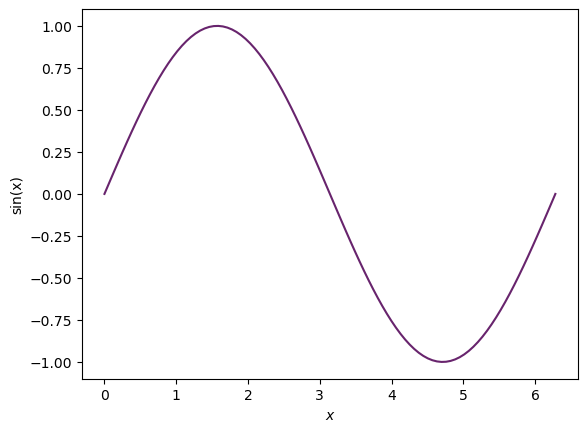

In [5]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.xlabel("$x$")
plt.ylabel("sin(x)")

## If there are multiple plots using subplots is usually the better idea

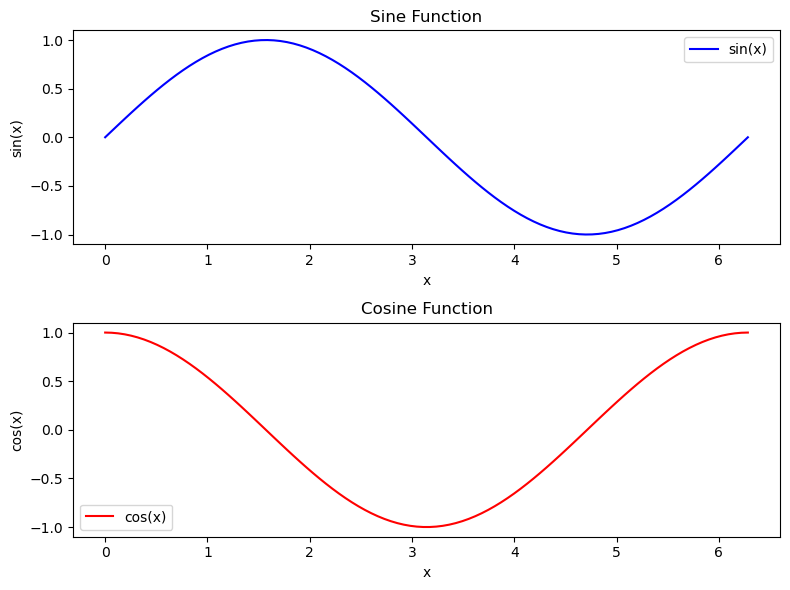

In [6]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the data on the subplots
axs[0].plot(x, y1, color='blue', label='sin(x)')
axs[1].plot(x, y2, color='red', label='cos(x)')

# Set titles and labels for each subplot
axs[0].set_title('Sine Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[1].set_title('Cosine Function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('cos(x)')

# Add legends to the subplots
axs[0].legend()
axs[1].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


## Exercise 1 
We can use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) for a simple linear regression. Use this to visualise and fit [Anscombe's quartett](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966) using the data located in `exercise_data/anscombe.json`.
Visualise the points as scatter plots and show the regression line. Give labels to the axes and try to vary the colors of the individual components. If you want you can also create a separate plot for the fitting statistics.

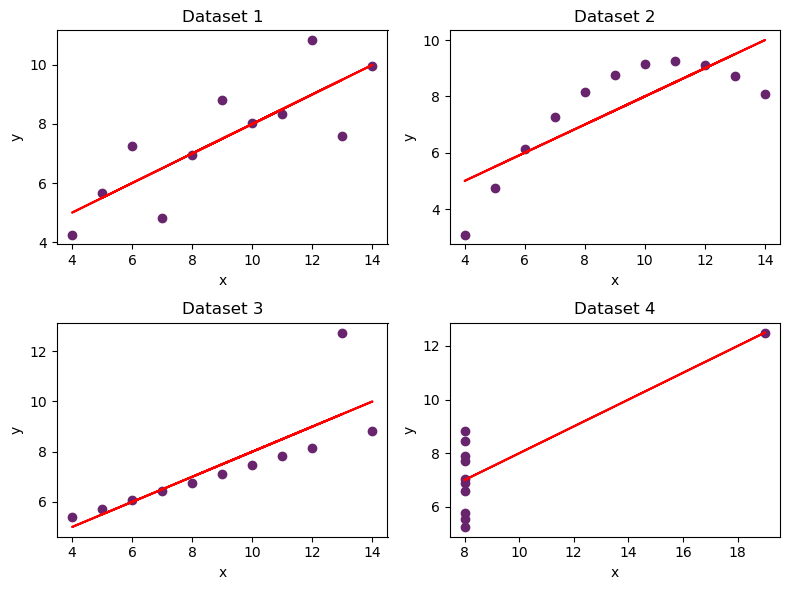

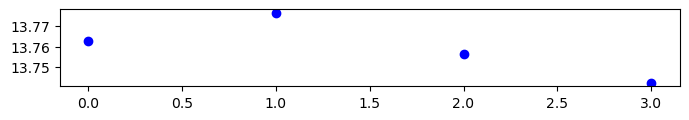

In [33]:
import json

with open('exercise_data/anscombe.json', 'r') as file:
    data_dict = json.load(file)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 1))

for i, ax in enumerate(axs.flat):
    data = data_dict[f'dataset{i+1}']
    x = np.array(data['x'])
    y = np.array(data['y'])
    ax.scatter(x, y)
    ax.set_title(f'Dataset {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x_fit, residuals, *_ = np.polyfit(x, y, 1, full=True)
    y_fit = np.polyval(x_fit, x)
    ax.plot(x, y_fit, color='red')
    ax2.scatter(i, residuals, color='blue')
fig.tight_layout()



## Encoding information
We can encode information in different ways. The three ways are: position, color and size.

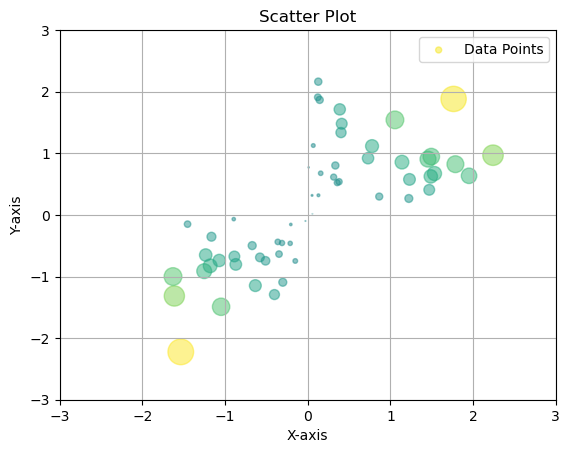

In [30]:
# Generate random data
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(
    x, y, c=x * y* 100, marker='o',
    s=x * y* 100,
    alpha=0.5
)

# Set plot title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Customize plot appearance
ax.grid(True)
ax.legend(['Data Points'])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Show the plot
plt.show()

## We can also set styles using an mplstyle file
This allows us to have consistent styling options within a body of work (paper). On the other hand we can use a different style sheet for another use case (e.g. a presentation, the thesis...)